In [8]:
import sklearn

In [33]:
import pandas as pd
import json
import numpy as np
import ast  # To parse list-like evidence data if stored as a string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from scipy.sparse import hstack
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score





In [10]:
df_fake= pd.read_csv('../data/Fake.csv')  # Example dataset
df_true = pd.read_csv('../data/True.csv')


In [11]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
df_fake['label'] = 1  # Fake news = 1
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [13]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [14]:
df_true['label'] = 0 # Real news = 0
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [15]:
df_news = pd.concat([df_fake, df_true], ignore_index=True)
df_news

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [16]:
df_news = df_news.drop(['date','subject'],axis=1)
df_news

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,0


In [17]:
import re

def clean_text(text):
    text = text.lower()  # lowercase everything
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"\d+", "", text)  # remove numbers
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # remove extra whitespace
    return text

df_news['clean_text'] = df_news['title'] + " " + df_news['text']
df_news['clean_text'] = df_news['clean_text'].apply(clean_text)
df_news

,title,text,label,clean_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,donald trump sends out embarrassing new years ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,sheriff david clarke becomes an internet joke ...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,trump is so obsessed he even has obamas name c...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,pope francis just called out donald trump duri...
...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0,fully committed nato backs new us approach on ...
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",0,lexisnexis withdrew two products from chinese ...
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,0,minsk cultural hub becomes haven from authorit...
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,0,vatican upbeat on possibility of pope francis ...


In [18]:
X = df_news['clean_text']
y = df_news['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [19]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 3), stop_words="english", max_features=5000, max_df=0.85, min_df=3, norm='l2')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [20]:
# Get feature names
feature_names = np.array(vectorizer.get_feature_names_out())

# Words to exclude
exclude_words = {"reuters"}

# Filter indices
valid_indices = [i for i, word in enumerate(feature_names) if word not in exclude_words]

# Apply filtering to TF-IDF matrices
X_train_tfidf = X_train_tfidf[:, valid_indices]
X_test_tfidf = X_test_tfidf[:, valid_indices]

# Update feature names if needed
filtered_feature_names = feature_names[valid_indices]


In [21]:
from sklearn.svm import LinearSVC

svm_model = svm.LinearSVC(C=0.01) 
svm_model.fit(X_train_tfidf, y_train)

LinearSVC(C=0.01)

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_model, X_train_tfidf, y_train, cv=5, scoring='f1_macro')
print("5-Fold Cross-Validated F1 Macro:", scores.mean())


5-Fold Cross-Validated F1 Macro: 0.9761009864159675


In [23]:
y_pred = svm_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9767260579064588


In [24]:
print("Classification Report:")
print(classification_report(y_test, y_pred,digits=5))

Classification Report:
              precision    recall  f1-score   support

           0    0.96979   0.98179   0.97576      4284
           1    0.98320   0.97210   0.97762      4696

    accuracy                        0.97673      8980
   macro avg    0.97650   0.97695   0.97669      8980
weighted avg    0.97681   0.97673   0.97673      8980



In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

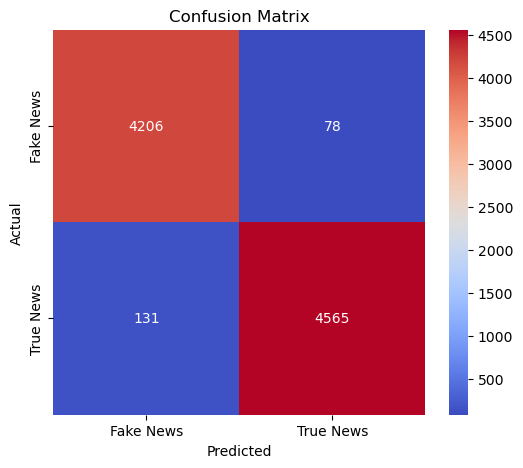

In [26]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=["Fake News", "True News"], yticklabels=["Fake News", "True News"])
plt.ylabel("Actual")
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

ROC AUC Score: 0.99758


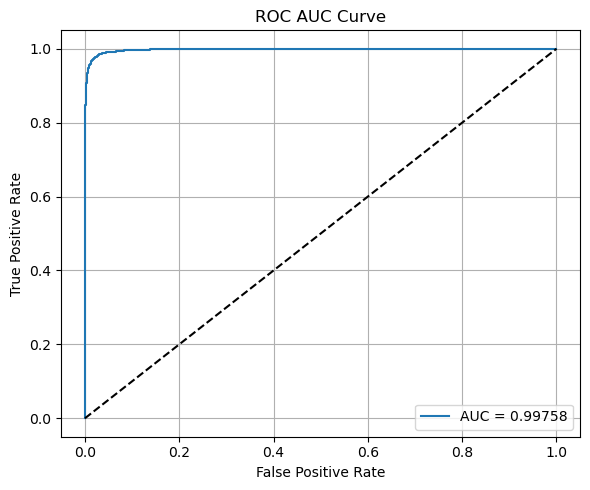

In [38]:
# ROC-AUC Curve
from sklearn.metrics import roc_curve, roc_auc_score


# For SVM: get decision scores instead of predicted labels
y_prob = svm_model.decision_function(X_test_tfidf)

# Calculate FPR, TPR and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.5f}")


# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.5f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
def classify_news_article(text, model, vectorizer, valid_indices=None):
    """
    Classify a news article as REAL or FAKE using a trained model and TF-IDF vectorizer.
    """
    # Convert article to TF-IDF
    vector = vectorizer.transform([text])
    
    # Apply feature filtering if valid_indices were used during training
    if valid_indices is not None:
        vector = vector[:, valid_indices]
    
    # Predict label
    prediction = model.predict(vector)[0]
    
    # Get decision confidence
    confidence = model.decision_function(vector)[0]
    
    # Label mapping
    label_map = {1: "FAKE", 0: "REAL"}
    
    print(f"Predicted Class: {prediction} => {label_map[prediction]}")
    print(f"Model Confidence (Distance from decision boundary): {confidence:.4f}")
    
    # return prediction, confidence


In [28]:
#real news article
news_article = news_article = """
Gaza’s fragile ceasefire shattered early Tuesday as Israel carried out deadly strikes across the enclave and Israeli Prime Minister Benjamin Netanyahu vowed to use “increasing military strength” against Hamas.

The overnight bombardments struck multiple locations across Gaza and were the most extensive since a months-long ceasefire came into effect, with Israel’s Defense Minister Israel Katz declaring: “Tonight we returned to fighting in Gaza.”

The ceasefire deal between Israel and Hamas was already hanging in the balance with phase one ending more than two weeks ago and all sides at loggerheads over a path forward that might see remaining Israeli hostages freed and a permanent peace secured.

Israel’s military and security agency said they were “currently conducting extensive strikes” on Hamas targets in Gaza. In response, Hamas accused Netanyahu of deciding to overturn the ceasefire agreement, and “putting the captives in Gaza at risk of an unknown fate.”

At least 210 people have been killed and hundreds wounded in the new wave of Israeli strikes, according to the Palestinian ministry of health in Gaza.

The Civil Defense in Gaza said a number people were “trapped under the rubble of homes that were bombed in various areas” of the enclave. CNN stringers in Gaza reported the sounds of strikes in multiple locations, including Gaza City, Khan Younis and Deir al-Balah.

Videos obtained by CNN showed scenes of panic and chaos across Gaza as families desperately rushed wounded loved ones to hospital and rescue workers transported patients in ambulances or on stretchers.

Many of the wounded were covered with bloodstained blankets, while others had their limbs wrapped in bloodied bandages.

The images showed several young children killed by the strikes.

Deaths and injuries, including of children, have been reported at hospitals ranging from the northern end of the strip to its southern tip more than 30 kilometers (18 miles) away, including Al-Awda hospital in Tal Al-Zaatar, northern Gaza; Al-Awda hospital in Nuseirat, central Gaza; and Nasser hospital in the southern city of Khan Younis.

Several hospitals said the casualties were due to civilian homes being hit by the strikes.
"""

classify_news_article(news_article, svm_model, vectorizer, valid_indices)


Predicted Class: 0 => REAL
Model Confidence (Distance from decision boundary): -0.3768


In [29]:
#fake news article 
news_article = """
Scientists Discover a Hidden City Beneath the Sahara Desert!

In an astonishing discovery, a team of archaeologists from an undisclosed research institute has reportedly uncovered the ruins of an ancient civilization beneath the Sahara Desert. Using ground-penetrating radar technology, researchers claim to have identified an extensive network of tunnels, structures, and artifacts dating back over 10,000 years—predating the Egyptian pyramids.

Lead scientist Dr. Marcus Langley stated, "This civilization appears to have been highly advanced, with evidence of an intricate water system and remnants of metal tools that do not match any known historical period."

Satellite images allegedly reveal massive underground chambers, leading to speculation that this lost city may be the true origin of many myths about lost civilizations. However, governments and scientific organizations remain skeptical, urging further investigation before drawing conclusions.

Critics argue that no verifiable evidence has been released, and some experts believe this may be an elaborate hoax or a misinterpretation of natural formations. Nevertheless, conspiracy theorists are already calling this the "Atlantis of the Sahara."

What else could be hidden beneath Earth's shifting sands?
"""
classify_news_article(news_article, svm_model, vectorizer, valid_indices)


Predicted Class: 1 => FAKE
Model Confidence (Distance from decision boundary): 0.4471


In [30]:
#dataset real news article
news_article = """
WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the “Dreamers,” people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. “We need to do DACA clean,” she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. As U.S. budget fight looms, Republicans flip their fiscal script
"""
classify_news_article(news_article, svm_model, vectorizer, valid_indices)

Predicted Class: 0 => REAL
Model Confidence (Distance from decision boundary): -0.9510


In [31]:
#dataset fake news article

news_article = """
Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.

Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing
"""
classify_news_article(news_article, svm_model, vectorizer, valid_indices)

Predicted Class: 1 => FAKE
Model Confidence (Distance from decision boundary): 0.9594
